<a href="https://colab.research.google.com/github/maximematerno/DS-Unit-2-Applied-Modeling/blob/master/module3/assignment_applied_modeling_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np

In [0]:
df = pd.read_csv('AB_TYO_2019.csv')

In [3]:
print(df.shape)
df.head()

(11466, 14)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24


In [0]:
df.isnull().sum()

id                         0
name                       0
host_id                    0
host_name                 16
neighbourhood_group    11466
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review             1677
reviews_per_month       1677
dtype: int64

In [0]:
df['host_id']

0           151977
1           964081
2           341577
3          1573631
4           341577
5           801494
6          1573631
7          4799233
8          4847803
9          5068769
10         5596383
11         6018145
12         5686404
13         6809418
14         6834839
15         6876728
16          151977
17         6606987
18         7103955
19         5710367
20         7537357
21         7537357
22         7740848
23         8142772
24         8142772
25         8142772
26         8142772
27         8529477
28         8529477
29         4847803
           ...    
11436    257492869
11437    270980984
11438    115399232
11439    271168519
11440    177431780
11441    271168519
11442     49124251
11443     47743240
11444    160395873
11445    221109442
11446    271201733
11447     55852804
11448    271253074
11449    265970848
11450    271253074
11451    131748110
11452    239049998
11453    269684336
11454    269684336
11455    189502014
11456    267308886
11457    201

In [0]:
df = df.replace('?', np.nan)

In [0]:
df.replace('NaT', np.nan,inplace=True)

In [6]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month
count,1.146600e+04,1.146600e+04,0.0,11466.000000,11466.000000,1.146600e+04,11466.000000,11466.000000,9789.000000
mean,2.640545e+07,1.399776e+08,NaN,35.687159,139.734537,1.498470e+04,3.316239,26.028868,2.262540
std,7.565212e+06,8.064289e+07,NaN,0.217853,0.092771,3.327345e+04,7.766766,38.455449,1.744004
min,3.530300e+04,1.519770e+05,NaN,27.072330,139.130020,0.000000e+00,1.000000,0.000000,0.040000
25%,2.215251e+07,5.783171e+07,NaN,35.679620,139.698975,6.026000e+03,1.000000,2.000000,1.000000
50%,2.841873e+07,1.502326e+08,NaN,35.701910,139.729165,1.000700e+04,1.000000,12.000000,2.060000
75%,3.222416e+07,2.135896e+08,NaN,35.724215,139.784270,1.721600e+04,2.000000,32.000000,3.170000
max,3.608660e+07,2.714130e+08,NaN,35.832430,142.202880,1.000046e+06,180.000000,453.000000,51.210000


In [7]:
df.describe(exclude='number')

,name,host_name,neighbourhood,room_type,last_review
count,11466,11450,11466,11466,9789
unique,10810,2054,56,3,413
top,Near Ueno#Cozy Hotel#6min to Subway#40min airport,M-1 Tokyo,Shinjuku Ku,Entire home/apt,2019-06-23
freq,22,133,1882,7463,395


In [0]:
pd.options.display.float_format = '{:.2f}'.format

In [9]:
df['price'].describe()

count     11466.00
mean      14984.70
std       33273.45
min           0.00
25%        6026.00
50%       10007.00
75%       17216.00
max     1000046.00
Name: price, dtype: float64

In [10]:
from sklearn.metrics import mean_absolute_error, r2_score
target = 'price'
y = df[target]
y_pred = [y.mean()] * len(y)
print('Mean Baseline:')
print('Mean Absolute Error', mean_absolute_error(y, y_pred))
print('R^2 score', r2_score(y, y_pred))

Mean Baseline:
Mean Absolute Error 9601.784116846387
R^2 score 0.0


In [0]:
#train/validate/test split
from sklearn.model_selection import train_test_split

train, validate = train_test_split(df, train_size=0.80, test_size=0.20, 
                               random_state=42)


In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                               random_state=42)
train.shape, validate.shape, test.shape

((9172, 14), (2294, 14), (2294, 14))

In [0]:
import plotly.express as px
px.scatter(train, x='number_of_reviews', y='neighbourhood', color='price', opacity=0.1)

In [0]:
import plotly.express as px
px.scatter(train, x='number_of_reviews', y='price')

In [0]:
import plotly.express as px
px.scatter(train, x='neighbourhood', y='price')

In [0]:
import plotly.express as px
px.scatter(train, x='longitude', y='latitude', color='price') # opacity=0.05

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, n_jobs=-1)
train['cluster'] = kmeans.fit_predict(train[['longitude', 'latitude']])
test['cluster'] = kmeans.predict(test[['longitude', 'latitude']])
px.scatter(train, x='longitude', y='latitude', color='cluster')

In [0]:
train.groupby('cluster').price.describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,398.00,15122.07,50821.93,1076.00,4950.00,10007.00,15360.50,1000046.00
1,5.00,6994.00,931.84,6456.00,6456.00,6456.00,6994.00,8608.00
2,5.00,11814.80,4602.62,9039.00,10007.00,10007.00,10007.00,20014.00
3,1393.00,15655.87,14517.22,1506.00,8070.00,12051.00,18830.00,249958.00
4,86.00,6473.56,5310.94,1184.00,3551.00,4519.00,7558.75,31958.00
5,437.00,11348.15,10962.47,3013.00,5595.00,7209.00,12051.00,129121.00
6,5.00,11190.60,6362.42,3981.00,4519.00,14957.00,16033.00,16463.00
7,17.00,8595.35,5047.60,3766.00,4519.00,7962.00,10007.00,20014.00
8,230.00,8714.74,8887.06,1184.00,3981.00,6026.00,9953.25,79948.00


In [0]:
from sklearn.cluster import KMeans
import numpy as np

def clean(X):
    # stop SettingWithCopyWarning
    X = X.copy()


    # X = pd.get_dummies(X['cluster'], prefix='cluster')
    # for col in clusters:
    #   X[col] = clusters[col] 
    
    X= X.drop(columns=['neighbourhood_group', 'host_id','id','last_review','last_review'])
    X = X.fillna(0)

    
    return X

train = clean(train)
val = clean(validate)
test = clean(test)

In [0]:
target = 'price'

X_train = train.drop(columns=target)
y_train = train[target]
X_validate = val.drop(columns=target)
y_validate = val[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import RobustScaler

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train , score on val 
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_validate)
print('Mean Absolute Error', mean_absolute_error(y_validate, y_pred))
print('R^2 score', r2_score(y_validate, y_pred))
print('Validation Accuracy', pipeline.score(X_validate,y_validate))

Mean Absolute Error 29942.52107672188
R^2 score -0.9923688421514407
Validation Accuracy -0.9923688421514407


In [0]:
 pipeline.named_steps
# importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
# %matplotlib inline
# import matplotlib.pyplot as plt

# n = 20
# plt.figure(figsize=(10,n/2))
# plt.title(f'Top {n} features')
# importances.sort_values()[-n:].plot.barh(color='grey');

{'ordinalencoder': OrdinalEncoder(cols=['name', 'host_name', 'neighbourhood', 'room_type'],
                drop_invariant=False, handle_missing='value',
                handle_unknown='value',
                mapping=[{'col': 'name', 'data_type': dtype('O'),
                          'mapping': Relaxing Koi Pad: High Floor Home in Tsukiji/Ginza       1
 Located in Asakusa area!観光に人気の浅草ｴﾘｱ!#401                 2
 301_池袋站6分钟两卧室三张双人床便利公寓                                   3
 三筋 Airport transfer whole house YADOYA AKIHABARA         4
 10 min to Shi...
 Hachijo Machi          42
 Inagi Shi              43
 Musashimurayama Shi    44
 Tama Shi               45
 Kodaira Shi            46
 Chofu Shi              47
 Niijima Mura           48
 Ome Shi                49
 Koganei Shi            50
 Akishima Shi           51
 Okutama Machi          52
 Higashikurume Shi      53
 Hinohara Mura          54
 Higashiyamato Shi      55
 Kozushima Mura         56
 NaN                    -2
 dtype: int64}

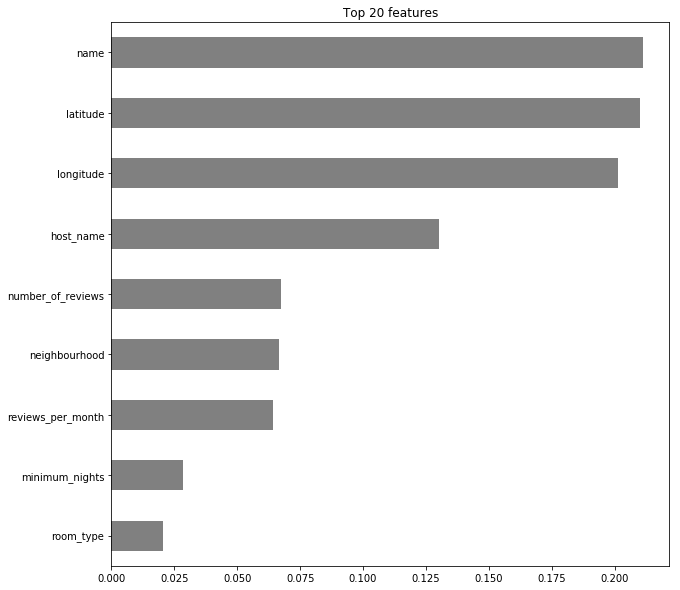

In [0]:
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
from sklearn.ensemble import RandomForestClassifier
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_validate_transformed = transformers.transform(X_validate)

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy', 
    n_iter=2, 
    random_state=42
)

permuter.fit(X_validate_transformed, y_validate)
feature_names = X_validate.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Weight,Feature
0.1399 ± 0.0009,host_name
0.1290 ± 0.0078,room_type
0.1020 ± 0.0078,latitude
0.0942 ± 0.0052,longitude
0.0669 ± 0.0031,neighbourhood
0.0619 ± 0.0035,minimum_nights
0.0392 ± 0.0000,number_of_reviews
0.0264 ± 0.0031,reviews_per_month
0.0070 ± 0.0017,name


In [18]:
pip install category-encoders


     |████████████████████████████████| 92kB 4.3MB/s 


In [19]:
pip install eli5

     |████████████████████████████████| 112kB 3.4MB/s 


In [0]:
from xgboost import XGBRegressor

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning:

Series.base is deprecated and will be removed in a future version



[21:44:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['name', 'host_name', 'neighbourhood',
                                      'room_type'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'name',
                                          'data_type': dtype('O'),
                                          'mapping': Relaxing Koi Pad: High Floor Home in Tsukiji/Ginza       1
Located in Asakusa area!観光に人気の浅草ｴﾘｱ!#401                 2
301_池袋站6分钟两卧室三张双人床便利公寓                                   3
三筋 Airpo...
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              m

In [0]:
y_pred = pipeline.predict(X_validate)
print('Validation Accuracy: ', pipeline.score(X_validate, y_validate))

Validation Accuracy:  0.05135240485089121


In [29]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_validate)
print('Gradient Boosting R^2', r2_score(y_validate, y_pred))

Gradient Boosting R^2 0.08529384166143206


In [55]:
example = X_validate.iloc[[0]]
example

,name,host_name,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month
7563,100 Years Old Japanese-style House in Oume city,Toshihiro,Ome Shi,35.83,139.26,Private room,1,2,0.85


In [57]:
pred = gb.predict(example)[0]
print(f'Predicted Price: {pred:.2f}$')

Predicted Price: 7038.14$


In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [68]:
import numpy as np

def vary_nights(model, example):
    print('Vary nights, hold other features constant', '\n')
    example = example.copy()
    preds = []
    for nights in range(1, 100, 1):
        example['minimum_nights'] = nights
        pred = model.predict(example)[0]
        print(f'Predicted nights: {pred:.3f}')
        print(example.to_string(), '\n')
        preds.append(pred)
    print('Difference between predictions')
    print(np.diff(preds))
        
vary_price(gb, example)

Vary price, hold other features constant 

Predicted Price: 35938.223$
                                                 name  host_name neighbourhood  latitude  longitude     room_type  minimum_nights  number_of_reviews  reviews_per_month
7563  100 Years Old Japanese-style House in Oume city  Toshihiro       Ome Shi     35.83     139.26  Private room            1000                  2               0.85 

Predicted Price: 35938.223$
                                                 name  host_name neighbourhood  latitude  longitude     room_type  minimum_nights  number_of_reviews  reviews_per_month
7563  100 Years Old Japanese-style House in Oume city  Toshihiro       Ome Shi     35.83     139.26  Private room            2000                  2               0.85 

Predicted Price: 35938.223$
                                                 name  host_name neighbourhood  latitude  longitude     room_type  minimum_nights  number_of_reviews  reviews_per_month
7563  100 Years Old Japanese-

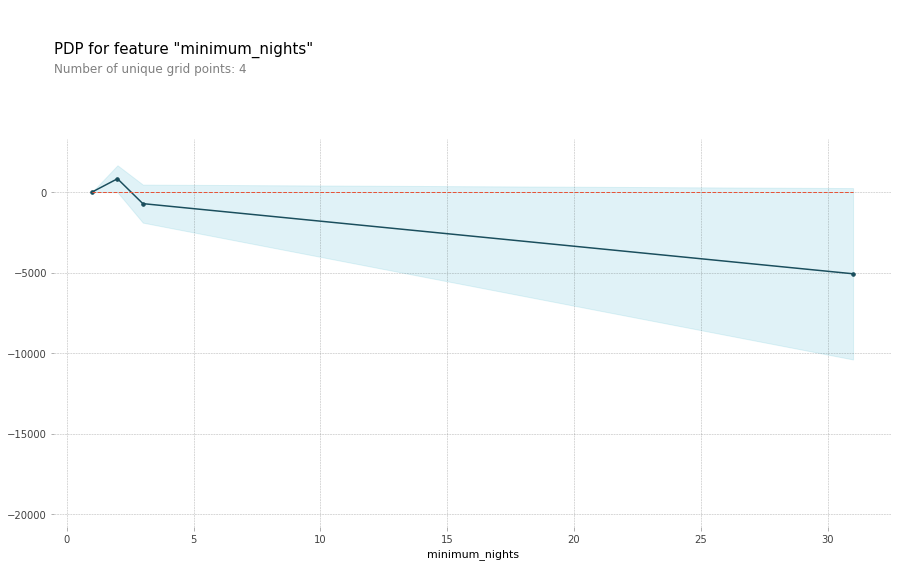

In [69]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'minimum_nights'

isolated = pdp_isolate(
    model= gb, 
    dataset=X_validate, 
    model_features=X_validate.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

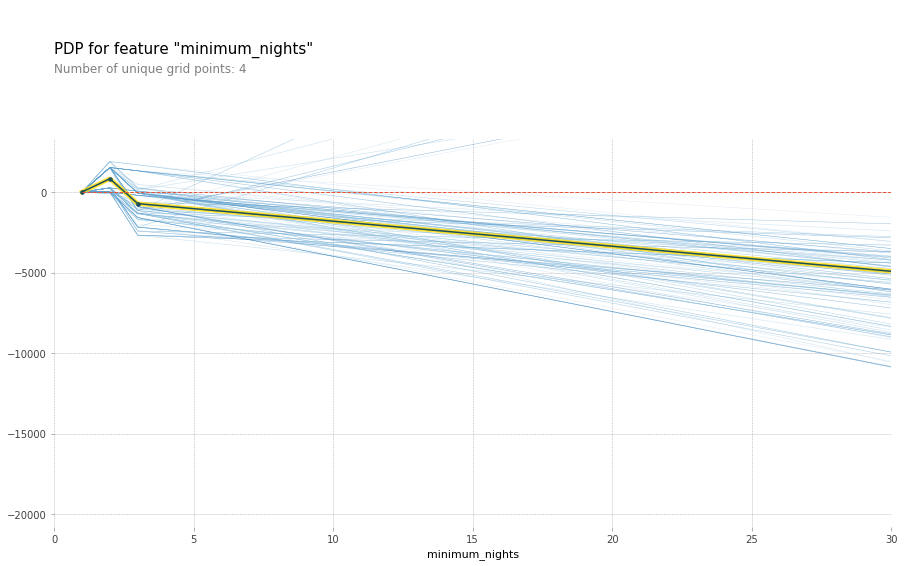

In [42]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100) # Plot 100 ICE lines
plt.xlim(0,30);

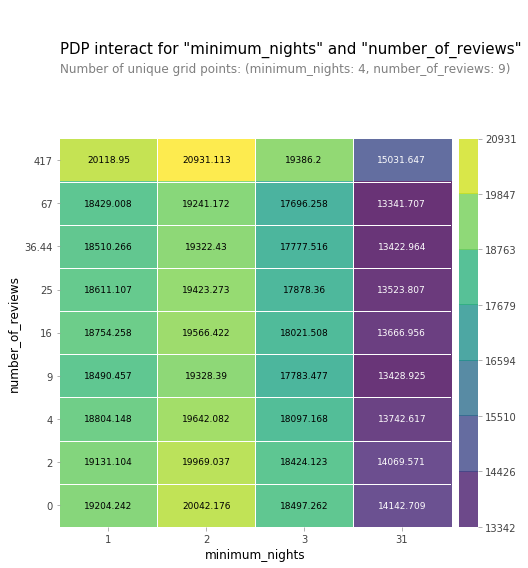

In [50]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['minimum_nights', 'number_of_reviews']

interaction = pdp_interact(
    model=gb, 
    dataset=X_validate, 
    model_features=X_validate.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

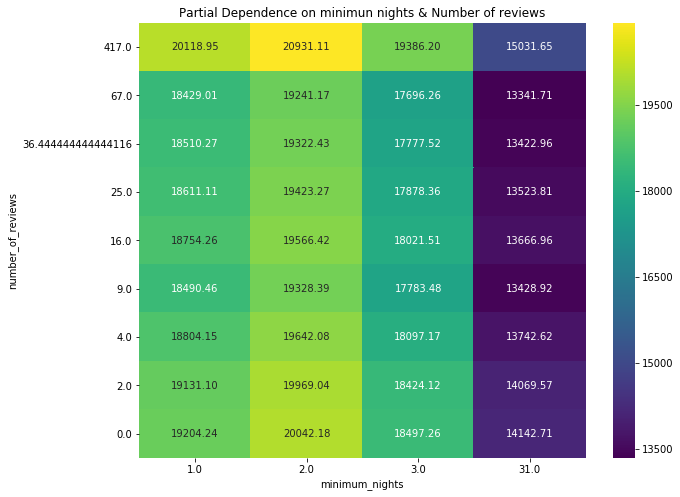

In [73]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
import seaborn as sns

pdp = interaction.pdp.pivot_table(
    values='preds', 
    columns=features[0], 
    index=features[1]
)[::-1] # Slice notation to reverse index order so y axis is ascending

plt.figure(figsize=(10,8))
sns.heatmap(pdp, annot=True, fmt='.2f', cmap='viridis')
plt.title('Partial Dependence on minimun nights & Number of reviews');

In [72]:
import plotly.graph_objs as go

surface = go.Surface(x=pdp.columns, 
                     y=pdp.index, 
                     z=pdp.values)

fig = go.Figure(surface)
fig.show()

In [24]:
pip install pdpbox

     |████████████████████████████████| 57.7MB 97.8MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=17b6a0b00222a8fc4e510057eb9bd26a591032850519589fc38ffd9f30b0d72c
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [33]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy', 
    n_iter=2, 
    random_state=42
)

permuter.fit(X_validate_transformed, y_validate)
feature_names = X_validate.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names
)

Using TensorFlow backend.


ValueError: ignored

In [0]:
pip install eli5


     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
from xgboost import XGBClassifier
transformers = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_validate_transformed = transformers.transform(X_validate)

model = XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model,
    scoring='accuracy', 
    n_iter=2, 
    random_state=42
)

permuter.fit(X_validate_transformed, y_validate)
feature_names = X_validate.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # show permutation importances for all features
    feature_names=feature_names


Weight,Feature
0.0996 ± 0.0013,host_name
0.0830 ± 0.0031,longitude
0.0791 ± 0.0092,room_type
0.0765 ± 0.0031,latitude
0.0390 ± 0.0031,minimum_nights
0.0329 ± 0.0109,neighbourhood
0.0227 ± 0.0000,number_of_reviews
0.0109 ± 0.0026,reviews_per_month
0.0081 ± 0.0022,name
